# Hinweise zur Modellrekonstruktion

In [1]:
# Numpy brauchen wir immer, das ist ja unser MatLab-Äquivalent
import numpy as np
# Für Grafiken nehmen wir bevorzugt Matplotlib pyplot
import matplotlib.pyplot as plt
# Die beiden Scipy Module sind für das Fitten und die Lösung des Anfangswertproblems                 
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp

### Um eine Zeitserie generieren zu können, brauchen wir eine Funktion und die Samplingpoints

Wir haben 2 Möglichkeiten. Einmal können wir das Anfangswerproblem lösen und zum anderen, da wir die Lösung ja kennen, könnten wir aus dieser direkt die Zeitserie generieren. Letzteres wollen wir auch für den einfachen Harmonischen Ozillator nicht tun, denn für den van der Pol kennen wir die Lösung nicht, also üben wir gleich hieran.

Wir definieren die Funktion $\vec{f}(x,v)$:

In [3]:
# rechte Seite des DGL-Systems. Achtung, das gibt zwei Werte zurück, also die beiden Funktionen 
# f(x,v) und g(x,v) aus unsrem Lernmodul.
def f(t,y):
    return y[1],-y[0]
# Integration von dy/dt=f(t,y)
r0=[1.,0.] # Anfangsbedingungen
t0=0.      # Anfangszeitpunkt
t1=10.     # Ende des Integrationsintervals
dt=0.001   # Zeitschritt
teval=np.linspace(t0,t1,int((t1-t0)/dt+1)) # Array mit den Stützstellen
rtol=1.e-12 # relative Toleranz und 
atol=1.e-14 # absolute Toleranz der Lösung durch ivp
# solve_ivp braucht als erstes Argument die Funktion, ein callable 
# mit Argumenten Skalar t und Vektor y, Intervall, Anfangsbedingungen und
# Mathode - in diesem Fall ein runge-Kutta 8. Ordnung, Auswertungszeitpunkte
# Toleranzen
#
sol=solve_ivp(f, [t0, t1], r0,method='DOP853',t_eval=teval,rtol=rtol,atol=atol)

<IPython.core.display.Javascript object>


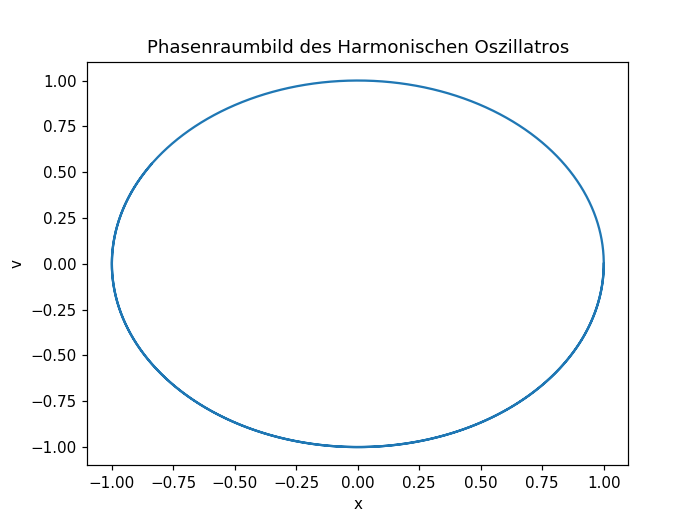

In [8]:
%matplotlib notebook
# Achtutung! Jedes cell-magic (hier %matplotlib) muss die erste Zeile in der Zelle
# eines Jupyternotebook sein
#
# Darstellung des Phasenraumbildes (x,v)
x=sol.y[0] # x an den von teval vorbelegten Stellen
v=sol.y[1] # v -"" -
plt.title('Phasenraumbild des Harmonischen Oszillatros') # Titel
plt.xlabel('x') # x-Achsen-
plt.ylabel('v') # v-Achsenbeschriftung
plt.plot(x,v)   # Zeichnen

### Nun berechnen wir die numerische Ableitung an den Stützstellen und fitten eine Funktion hieran

In [11]:
# Die Ableitungen von x und v. Vorsicht! 2. Ordnung Fehlergenauigkeit auch
# an den Rändern des Intervalls, daher edge_order=2
xdot=np.gradient(x,dt,edge_order=2)
vdot=np.gradient(v,dt,edge_order=2)
sol.t.shape # Wieviele Stützstellen haben wir?

(10001,)

<IPython.core.display.Javascript object>


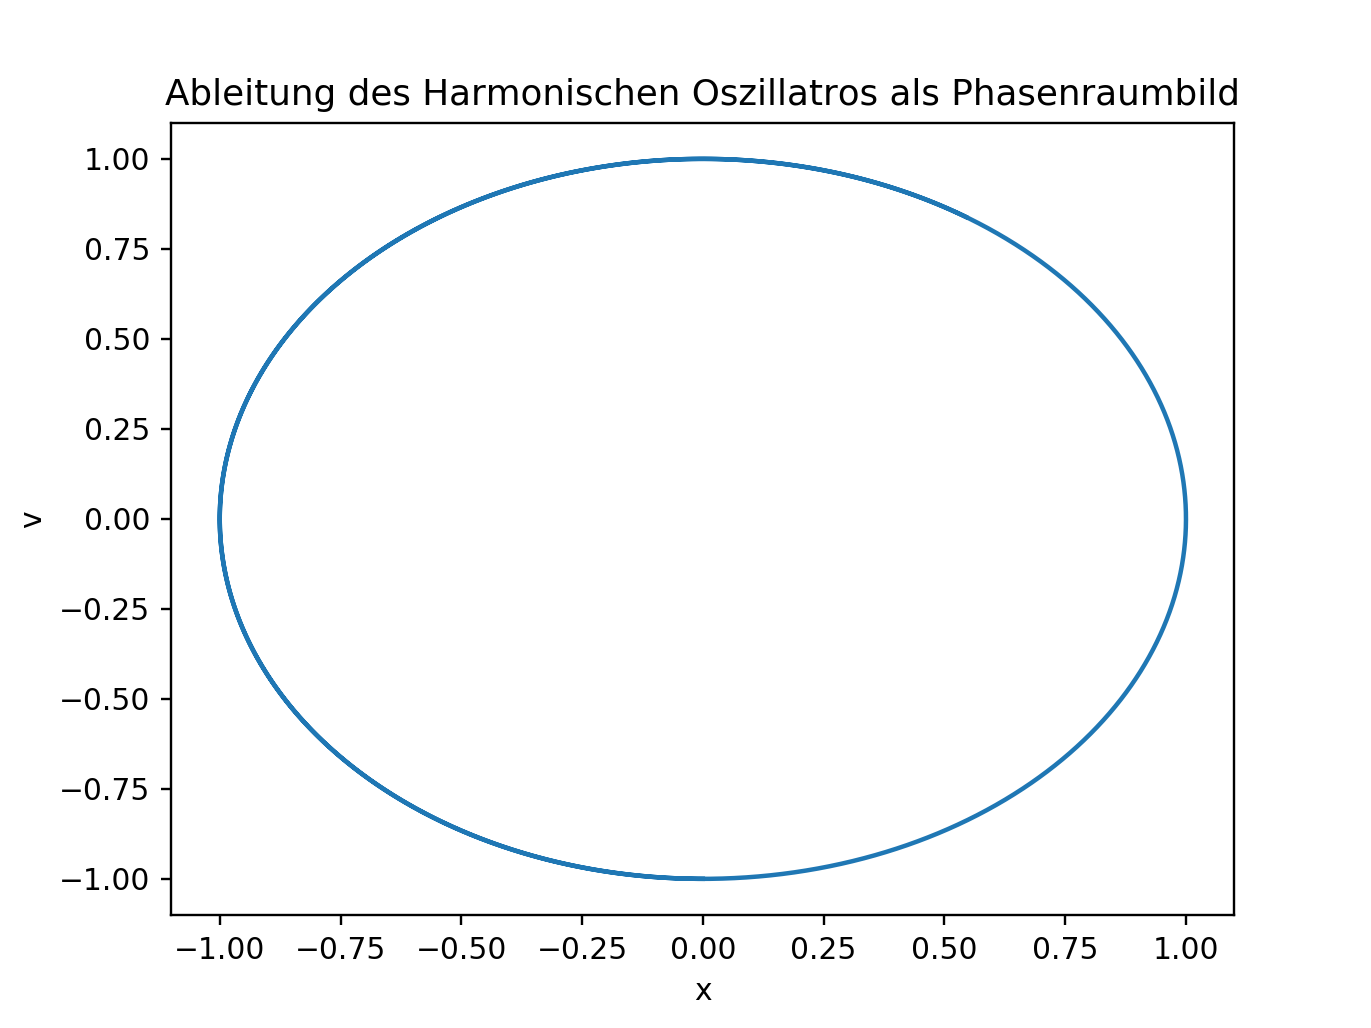

In [12]:
%matplotlib notebook
# Darstellung der Ableitung im Phasenraum
plt.title('Ableitung des Harmonischen Oszillatros als Phasenraumbild') # Titel
plt.xlabel('x') # x-Achsen-
plt.ylabel('v') # v-Achsenbeschriftung
plt.plot(xdot,vdot)   # Zeichnen

Nun fitten wir die Ableitung $\dot{x}$ und $\dot{v}$ an Funktionen $f(x,v)=a_0+a_1\cdot x+a_2\cdot v$ und $\dot{v}$ an $g(x,v)=b_0+b_1\cdot x+b_2\cdot v$. Dazu müssen wir die Funktionen definieren, die für den Fit und für die Lösung des Anfangswertproblems eingesetzt werden.

In [18]:
# Definiere die Funktion die an xdot und vdot gefittet werden soll
def fit(XY,*a):        # Variables Argument *a
    x,v=XY             # xdot ist i.A. eine Funktion von x und v
    return a[0]+a[1]*x+a[2]*v # +a[3]*x**2+a[4]*x*v+a[5]*v**2 # das hier später!
#
# Defininition der Funktion für solve_ivp. Dies ist nur um das Resultat zu prüfen.
# Eigentlich reichen uns die $a_i$ aus dem Fit
def func(t,XY,*argv):
    a,b=argv
    x,y=XY
    #a=args[0]
    return [a[0]+a[1]*x+a[2]*y+a[3]*x**2+a[4]*x*y+a[5]*y**2,b[0]+b[1]*x+b[2]*y+b[3]*x**2+b[4]*x*y+b[5]*y**2]

In [19]:
# Fitten Sie die Funktion an die Ableitung von x
popt,pcov = curve_fit(fit,(x,v),xdot,p0=np.ones(3))

Machen Sie nun dasselbe für vdot und im Nachklapp dann für ein Polynom in der Funktion fit(XY,*a) bis zur 2. Ordnung. Berechnen Sie mit der Funktion func und der Routine solve_ivp die Lösung des Systems von Differentialgleichungen und zeichnen Sie ein Phasenraumbild.